# LENDING CLUB CASE STUDY


 ## <font color='blue'>Introduction</font>
 
 >   A very important area of risk analytics of banking and financial services is identifing risky applicants.This case study aims to provide us an idea of implementing EDA to figure out the solution for this problem. we will also develope a basic understanding of risk analytics in banking and financial services. 

## <font color="blue">Business understanding</font>

   >When a company receives a loan application from the applicant, the company has to decide whether to approve it or not based on the applicant's profile.
There are two types of risk involved in it:
>- Approving loan to the applicant, who is not likely to pay, which leads to financial loss.
>- Not approving loan to the applicant, who is likely to pay, which leads to business loss.
>
>when a person applies for a loan, the lender could take two types of decision:
> ### 1.Loan accepted: 
>If the company approves the loan, then there are three possible scenarios:
>- Fully paid - The Customer has fully paid the loan.
>- Current - The customer is in the process of paying the loan. The tenure of the loan is not yet completed.
>- Charged-off - The customer who failed to repay the loan in due time for a long period of time.
>
> ### 2.Loan rejected:
> The company had rejected the loan because the client does not meet the requirement of the loan.


##  <font color="blue">Business objectives
    
>   In order to avoid the credit loss, it is necessary to identify patterns which indicates if a person is likely to default, so that the lenders can take decisions like rejecting the loan, reducing the amount of loan, lending loan with high interest rate, etc. This will ensure that customers who is likely to repay the loan are not rejected.
>
>The company wants to identify the driving factors beyond loan defaults. If they understood the driving factor, they can able to take effective decisions. 

## <font color="blue">Data understanding
    
> ### 1. 'loan.csv'
> It contains all the information about past loan applicants and whether they paid on due time or got defaulted.
>
> ### 2. 'Data_Dictionary.xlsx'
> It is a data dictionary which describes the meaning of the variable.

## <font color="blue">Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt

## <font color="blue">Customizing Settings

In [2]:
# Expanding output display to see all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x:"%.3f" %x)
pd.set_option("display.width", 100)

## <font color="blue">Importing Data

In [3]:
#importing loan data
#As the data contains different dtypes in a same column, allowing to access more memory will avoid future errors
Loan_data = pd.read_csv("loan.csv", low_memory=False, index_col="id")

#importing data dictionary for the reference
Loan_schema = pd.read_excel("Data_Dictionary.xlsx", index_col="LoanStatNew")

In [4]:
# displaying first three rows of loan_data
Loan_data.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [5]:
## displaying first three rows of loan_schema
Loan_schema.head(3)

,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
LoanStatNew,,,,,,,,,,
acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color="blue">Data Handling and Cleaning

### Fixing rows and  columns

In [6]:
#shape of the dataframes
print("shape of loan data   :", Loan_data.shape)
print("shape of loan schema :", Loan_schema.shape)

shape of loan data   : (39717, 110)
shape of loan schema : (117, 10)


In [7]:
#droping all empty columns in loan schema for easy usage
Loan_schema.dropna(how="all", axis=1, inplace=True)
print("After dropping the empty columns, the shape of loan_schema is",Loan_schema.shape)

After dropping the empty columns, the shape of loan_schema is (117, 1)


In [8]:
#deleting empty columns in loan data
Loan_data.dropna(how="all", axis=1,inplace=True)
print("After dropping the empty columns, the shape of loan_data is",Loan_data.shape)

After dropping the empty columns, the shape of loan_data is (39717, 56)


In [9]:
#checking for empty rows in loan data
Loan_data.dropna(how="all", axis=0).shape

(39717, 56)

No empty rows in the dataframe

In [10]:
#checking for duplicate ID in loan data(index)
print("Total unique Id in Loan_data is", Loan_data.index.nunique())
print("Total rows in the Loan_data is",Loan_data.shape[0])

Total unique Id in Loan_data is 39717
Total rows in the Loan_data is 39717


From this data, it is evident that the given dataset has no duplicate rows.

In [11]:
#droping the columns having same values
nunique = Loan_data.nunique()
Loan_data.drop(nunique[nunique==1].index , axis=1, inplace=True)
print("After dropping the columns having same values, the shape is",Loan_data.shape)

After dropping the columns having same values, the shape is (39717, 47)


In [12]:
#droping the columns irrelavant to the study
#we can drop url column, as it contains same host name and path
Loan_data.drop(["url"], axis=1, inplace=True)
print("After dropping url column, the shape is",Loan_data.shape)

After dropping url column, the shape is (39717, 46)


In [13]:
#cleaning columns name
Loan_data.columns = Loan_data.columns.str.strip().str.capitalize()
Loan_schema.index = Loan_schema.index.str.strip().str.capitalize()
Loan_data.index.name = "Id"

In [14]:
Loan_data.head(2)

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Desc,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Mths_since_last_delinq,Mths_since_last_record,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Next_pymnt_d,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000


### Missing Value Treatment

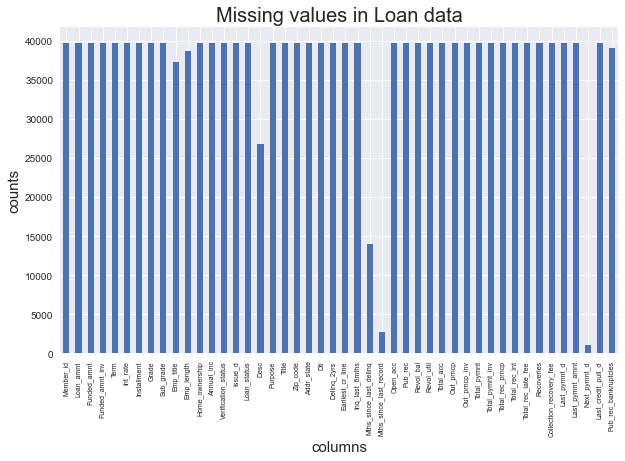

In [15]:
#plotting missing values in loan data
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
Loan_data.count().plot.bar()
plt.xticks(rotation=90,fontsize=7)
plt.title("Missing values in Loan data",fontsize=20)
plt.xlabel("columns", fontsize=15)
plt.ylabel("counts",fontsize=15)
plt.show()

#### Columns with missing values more than 50%:

The columns Mths_since_last_record,Mths_since_last_delinq, Next_pymnt_d have missing values more than 50%.

#### Suggestion:

>We can drop the columns Mths_since_last_record, Mths_since_last_delinq, Next_pymnt_d.

In [16]:
#dropping the columns having missing value more than 50%
Loan_data.drop(["Mths_since_last_record","Mths_since_last_delinq","Next_pymnt_d"], axis=1, inplace=True)
Loan_data.shape

(39717, 43)

#### Cleaning Desc column:

In [17]:
print("Total number of missing values in Desc column are",Loan_data["Desc"].isnull().sum())

Total number of missing values in Desc column are 12940


#### Suggestion:

>We can drop the Desc column, as it contains more missing values.

In [18]:
#dropping Desc column
Loan_data.drop("Desc", axis=1, inplace=True)

#### Cleaning the columns Emp_title and Emp_length:

In [19]:
print("Missing values in Emp_title column are", Loan_data["Emp_title"].isnull().sum())
print("Missing values in Emp_length column are", Loan_data["Emp_length"].isnull().sum())

Missing values in Emp_title column are 2459
Missing values in Emp_length column are 1075


#### Suggestion:
>As the columns Emp_title and Emp_length are key variables for the study, we can drop the missing value rows.

In [20]:
#droping rows having nan values in Emp_title column
Loan_data = Loan_data[-(Loan_data["Emp_title"].isnull())]

In [21]:
#droping rows having nan values in Emp_length column
Loan_data = Loan_data[-(Loan_data["Emp_length"].isnull())]

#### Cleaning the Revol_util column:

In [22]:
print("Missing values in Revol_util column are", Loan_data["Revol_util"].isnull().sum())

Missing values in Revol_util column are 46


#### suggestion:
> We can fill the mode value in the place of missing values.

In [23]:
Loan_data["Revol_util"].value_counts()

0%        883
0.20%      60
63%        58
66.60%     55
70.40%     55
         ... 
0.04%       1
11.62%      1
70.26%      1
33.29%      1
8.01%       1
Name: Revol_util, Length: 1082, dtype: int64

In [24]:
#filling the missing values with mode value
Loan_data["Revol_util"].fillna(Loan_data["Revol_util"].mode()[0], inplace=True)

#### Cleaning the Title column:

In [25]:
print("Missing values in Title column are", Loan_data["Title"].isnull().sum())

Missing values in Title column are 9


#### Suggestion:
> We can fill the mode value in the place of missing values.

In [26]:
Loan_data["Title"].value_counts()

Debt Consolidation                       2089
Debt Consolidation Loan                  1652
Personal Loan                             632
Consolidation                             501
debt consolidation                        473
                                         ... 
George                                      1
Discover Payments                           1
new air conditioner and stair railing       1
Med                                         1
Frank's Loan                                1
Name: Title, Length: 18391, dtype: int64

In [27]:
#filling the missing value with mode value
Loan_data["Title"].fillna(Loan_data["Title"].mode()[0], inplace=True)

#### Cleaning the Last_pymnt_d column:

In [28]:
print("Missing values in Last_pymnt_d column are", Loan_data["Last_pymnt_d"].isnull().sum())

Missing values in Last_pymnt_d column are 64


#### Suggestion:
> We can fill the mode value in the place of missing values.

In [29]:
#cleaning Last_pymnt_d column
Loan_data["Last_pymnt_d"].value_counts()

May-16    1174
Mar-13     969
Dec-14     876
May-13     857
Feb-13     817
          ... 
Jun-08      10
Apr-08      10
Mar-08       5
Jan-08       2
Feb-08       1
Name: Last_pymnt_d, Length: 101, dtype: int64

In [30]:
#filling missing values with mode value
Loan_data["Last_pymnt_d"].fillna(Loan_data["Last_pymnt_d"].mode()[0],inplace=True)

#### Cleaning the Pub_rec_bankruptcies column:

In [31]:
print("Missing values in Pub_rec_bankruptcies column are", Loan_data["Pub_rec_bankruptcies"].isnull().sum())

Missing values in Pub_rec_bankruptcies column are 654


#### suggestion:
> We can fill the mode value in the place of missing values.

In [32]:
Loan_data["Pub_rec_bankruptcies"].value_counts()

0.000    35039
1.000     1502
2.000        7
Name: Pub_rec_bankruptcies, dtype: int64

In [33]:
#cleaning Pub_rec_bankruptcies column
Loan_data["Pub_rec_bankruptcies"].fillna(Loan_data["Pub_rec_bankruptcies"].mode()[0], inplace=True)

In [34]:
print("The final shape of the loan data after dropping all the unnecessary rows and columns is",Loan_data.shape)

The final shape of the loan data after dropping all the unnecessary rows and columns is (37202, 42)


In [35]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1077430 to 87023
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Member_id                37202 non-null  int64  
 1   Loan_amnt                37202 non-null  int64  
 2   Funded_amnt              37202 non-null  int64  
 3   Funded_amnt_inv          37202 non-null  float64
 4   Term                     37202 non-null  object 
 5   Int_rate                 37202 non-null  object 
 6   Installment              37202 non-null  float64
 7   Grade                    37202 non-null  object 
 8   Sub_grade                37202 non-null  object 
 9   Emp_title                37202 non-null  object 
 10  Emp_length               37202 non-null  object 
 11  Home_ownership           37202 non-null  object 
 12  Annual_inc               37202 non-null  float64
 13  Verification_status      37202 non-null  object 
 14  Issue_d         